# Image Classification

- Nearest Neighbours Classifier
- k-nearest Neighbours Classifier
- Validation Set for Hyperparameter Tuning

## Validation Set for Hyperparameter Tuning

- Test sets cannot be used for tweaking the hyperparameters because then in practice, we would end up overfitting the test set which is undesirable.

- In simple words, if we are using the test set for the hyperparameter tuning, we are actually training our data on it eliminating the whole purpose of unseen data for generalization of a model.

- Validation Test: Split the training set into a large and a smaller part, where the smaller part is called the validation set, which is part of the training set, and after each iteration, we test our model while training on the validation data to proxy the test set and tune the hyperparameter accordingly.

- Cross Validation Set: A validation set is feasible when we have huge amount of training data, such as CIFAR-10 having 50,000 images where we can keep a train set of 49,000 images and a validation set of 1000 images. However, when the size of the training data is very small, then making a validation set out of it may lead to underfitting due to lack of training data.

- We make use of an intuitive idea of dividing the training set into 'k' number of folds by splitting the data, and training on 'k-1' folds while testing on the last fold. For example, in case of a cross validation set with k=5, we divide the training data into five folds and train the data on 4 then test on the remaining, this is carried out for each fold, hence each of the 5 folds gets to be the validation set once, but this comes at the cost of more expensive computation.<br/>
![alt-text](https://cs231n.github.io/assets/crossval.jpeg)<br/>

- There are actually two methods of developing Cross Validation Set as well:
  - Leave Out Cross Validation (LOCV): In this method, we leave out exactly one data point to test the training, instead of a set of data points. This process will repeat for all the data points. However, it has its own merits and demerits:
  1. It will result in low biased model because each data point is treated independently.
  2. It will compute n times for n training instances, hence the execution time will increase.
  3. It will result in huge variation for test data, since we are validating our model on each data point and if even one data point turns out to be an outlier then we will have a huge variation in the testing of the model.

-  K-Fold Cross Validation: This method we have discussed already and the need of it arises from the following factors:
  1. We should train the model on majority of data in order to not miss any feature including outlier data points
  2. We need to keep the unseen test or validation data in a good proportion if not equally in size as training data so that there is no huge variance in the model.
  3. Training multiple times is needed and for that a single data point is not enough to validate the model.

**Algorithm:**

1. Split the data with random shuffle in K folds.
2. Train the model on K-1 folds and validate it on the Kth Fold.
3. Repeat this for each fold ie K times.
4. Compute the errors for each fold.
5. Average all the errors to get a single performance metric known as **cross-validation-error**.

- Stratified K-Fold Cross Validation: Random Sampling might lead to minority class underrepresentation, that can potentially result in a biased model when handling imbalanced classification problems or imbalanced data in general. 

  - It is important to rearrange the instances as to ensure that the cross validation results in sample representative of the entire population. 
  - This is achieved by stratified sampling of the data with equal representation given to the minority and majority classes to ensure a better generalization of the model on the data.

- Adversarial Validation: In real life scenarios, we can observe that the training and testing data are completely unfamiliar with each other and thus making use of a validation set out of the training data seems a far fetched technique to build generalized models. 

  - The general idea is to check the degree of similarity between training and tests in terms of feature distribution. If it does not seem to be the case, we can suspect they are quite different. This intuition can be quantified by combining train and test sets, assigning 0/1 labels (0-train, 1-test) and evaluating a binary classification task.



In [2]:
"""Let us try to visualise the use of K-Fold cross validation by building a
   network from scratch using tensorflow keras"""

import tensorflow as tf
from keras import regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


Using TensorFlow backend.


In [3]:
# Model configuration
batch_size = 25
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
optimizer = Adam()
verbosity = 1

In [ ]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
# Basic Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Fit data to model

history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity)

Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 1.4461 - accuracy: 0.4831
Epoch 2/100
2000/2000 [==============================] - 5s 2ms/step - loss: 1.0448 - accuracy: 0.6347
Epoch 3/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.8695 - accuracy: 0.6945
Epoch 4/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.7479 - accuracy: 0.7387
Epoch 5/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6415 - accuracy: 0.7747
Epoch 6/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5485 - accuracy: 0.8081
Epoch 7/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4567 - accuracy: 0.8385
Epoch 8/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3788 - accuracy: 0.8660
Epoch 9/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3162 - accuracy: 0.8877
Epoch 10/100
2000/2000 [==============================] - 5s 2ms/step - l

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 4.820514678955078 / Test accuracy: 0.669700026512146


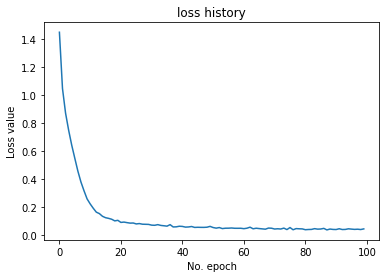

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

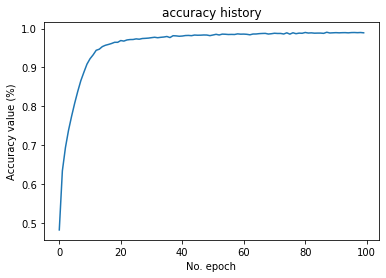

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
# We need to add K-Fold Cross Validation to the Model now
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
# K value
num_folds = 2

In [ ]:
kfold = KFold(n_splits=num_folds, shuffle=True)

In [ ]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

In [ ]:
fold_no = 1
# The dataset will overfit after one fold and we can see the effects of the
# same in the training history
for train, test in kfold.split(input_train, target_train):
   # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=75,
              verbose=verbosity)
   # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/75
1000/1000 [==============================] - 6s 6ms/step - loss: 2.3188 - accuracy: 0.1238
Epoch 2/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.9556 - accuracy: 0.2946
Epoch 3/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.7618 - accuracy: 0.3667
Epoch 4/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.6400 - accuracy: 0.4057
Epoch 5/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.5431 - accuracy: 0.4409
Epoch 6/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.4626 - accuracy: 0.4724
Epoch 7/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.4014 - accuracy: 0.4985
Epoch 8/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.3451 - accuracy: 0.5188
Epoch 9/75
1000/1000 [==============================] - 6s 6ms/step - loss: 1.2946 - ac

In [ ]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 5.147888660430908 - Accuracy: 50.731998682022095%
------------------------------------------------------------------------
> Fold 2 - Loss: 2.302966594696045 - Accuracy: 9.752000123262405%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 30.24199940264225 (+- 20.489999279379845)
> Loss: 3.7254276275634766
------------------------------------------------------------------------


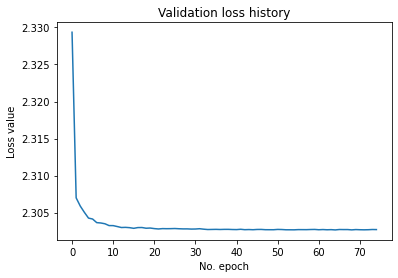

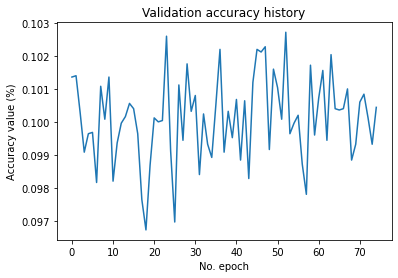

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# Visualizing PCA on CIFAR-10

Dimensionality Reduction is a simple technique to represent the higher dimensional data as lower dimensional data without losing the relevant information. It is important in the domain of handling Big Data, considering the huge amount of computational power used in the processing of huge datasets. 

There are many dimensionality reduction techniques, we will try to visualise and understand only PCA in this notebook.




In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(y_train.shape)

170500096/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [5]:
x_train = X_train.reshape(X_train.shape[0],-1)
x_test = X_test.reshape(X_test.shape[0], -1)

In [6]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [7]:
import numpy as np
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [8]:
feature_columns = ['pixel'+str(i) for i in range(x_train.shape[1])]

In [9]:
import pandas as pd
df_cifar = pd.DataFrame(x_train, columns=feature_columns)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [10]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,59,62,63,43,46,45,50,48,43,68,54,42,98,73,52,119,91,63,139,107,75,145,110,80,149,117,89,149,120,93,131,103,77,125,99,76,142,115,91,144,...,148,103,77,161,105,69,144,95,55,112,90,59,119,91,58,130,96,65,120,87,59,92,67,46,103,78,57,170,140,104,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,101,99,125,131,139,155,166,180,172,190,210,180,199,214,142,156,156,111,120,110,106,107,98,109,104,102,123,121,117,127,...,5,6,11,6,6,11,10,9,12,25,22,22,51,45,42,68,64,67,90,90,101,116,113,122,134,127,133,140,130,136,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,76,90,90,72,86,86,64,78,78,64,78,78,69,83,83,66,80,80,55,69,69,52,66,66,58,72,72,68,80,79,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,37,23,44,39,25,40,37,22,40,38,23,24,23,9,32,25,15,43,27,19,30,20,10,32,30,17,41,37,23,52,...,122,99,67,107,85,54,112,96,66,92,81,53,80,62,39,96,78,59,77,67,42,85,76,44,84,75,48,67,57,38,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,193,211,181,196,218,177,195,220,181,195,223,184,192,223,189,190,223,189,189,222,188,193,224,183,194,223,182,194,223,184,...,93,98,102,90,95,99,88,93,97,83,89,92,77,87,88,75,84,85,71,81,82,74,80,83,72,76,79,71,75,78,75,79,82,71,75,78,73,77,80,1


In [ ]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [ ]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-1632.259496,695.904884,6
1,211.594763,-242.235519,9
2,1971.200943,-2938.136086,9
3,-2638.693419,2.738235,4
4,-669.541001,-1267.156191,1


In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


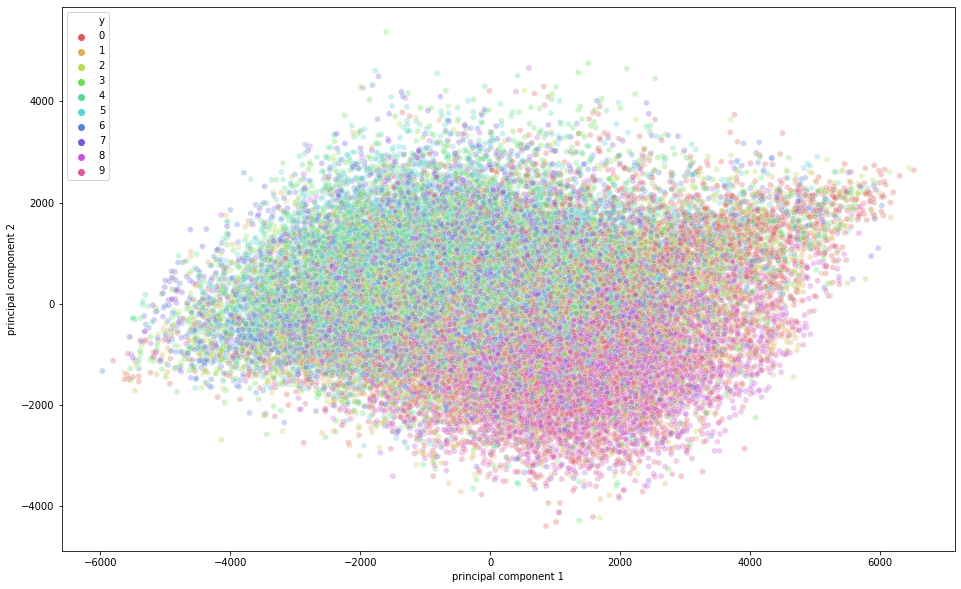

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)